In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
df = pd.read_csv('D:\Study\AIML-D-Study\Data_sets\student_lifestyle_dataset.csv')

In [9]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [11]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [12]:
df.isnull().sum()   

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [15]:
df.drop(columns=['Student_ID'], inplace=True)

In [16]:
df

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,8.1,0.7,7.6,3.5,4.1,3.04,High


In [17]:
df["Performance"] = df["GPA"].apply(lambda x: 0  if x <= 2.5  else 1 if x <=3.5  else 2)

In [18]:
df

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,Performance
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,1
1,5.3,3.5,8.0,4.2,3.0,2.75,Low,1
2,5.1,3.9,9.2,1.2,4.6,2.67,Low,1
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,1
4,8.1,0.6,6.5,2.2,6.6,3.51,High,2
...,...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,3.32,Moderate,1
1996,6.3,2.8,8.8,1.5,4.6,2.65,Moderate,1
1997,6.2,0.0,6.2,0.8,10.8,3.14,Moderate,1
1998,8.1,0.7,7.6,3.5,4.1,3.04,High,1


In [19]:
df.drop(columns=["GPA"], inplace=True)


In [20]:
df.replace({"Stress_Level": {"Low":0, "Moderate":1, "High":2}}, inplace=True)

C:\Users\raza\AppData\Local\Temp\ipykernel_17840\1763117798.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Stress_Level": {"Low":0, "Moderate":1, "High":2}}, inplace=True)


In [21]:
df

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Performance
0,6.9,3.8,8.7,2.8,1.8,1,1
1,5.3,3.5,8.0,4.2,3.0,0,1
2,5.1,3.9,9.2,1.2,4.6,0,1
3,6.5,2.1,7.2,1.7,6.5,1,1
4,8.1,0.6,6.5,2.2,6.6,2,2
...,...,...,...,...,...,...,...
1995,6.5,0.2,7.4,2.1,7.8,1,1
1996,6.3,2.8,8.8,1.5,4.6,1,1
1997,6.2,0.0,6.2,0.8,10.8,1,1
1998,8.1,0.7,7.6,3.5,4.1,2,1


In [22]:
X = df.drop(columns=["Performance"])
y = df["Performance"]

In [49]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = LogisticRegression()

In [52]:
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(X_test) 

In [54]:
accuracy = accuracy_score(y_test, y_pred)   

In [55]:
accuracy

0.8725

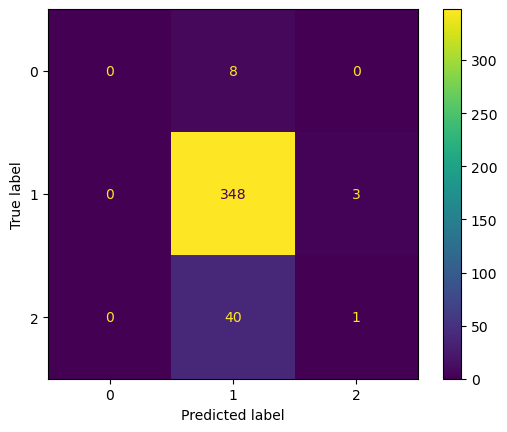

In [56]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [57]:
new_student = np.array([[8.1, 0.6, 6.5, 2.2, 6.6, 2]])

In [63]:
new_student_scaled = scalar.transform(new_student)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
prediction = model.predict(new_student_scaled)
prediction

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [67]:
if prediction[0] == 0:
    print("The student's performance is Low")
elif prediction[0] == 1:
    print("The student's performance is Moderate")
else:
    print("The student's performance is High")

The student's performance is High
